## Compare EMO-BON metaGOflow outputs to other MGnify studies

- This is also published as jupyter book [chapter](https://lab.fairease.eu/book-marine-omics-observation/comparative-taxonomy-campaigns/).

1. Study MGYS00006608, 16S rRNA amplicon sequencing from the Ocean Sampling Day (OSD) campaign June 2018 (ERP124424_taxonomy_abundances_SSU_v5.0)
2. Study MGYS00006607, 16S rRNA amplicon sequencing from the Ocean Sampling Day (OSD) campaign June 2019 (ERP124431_taxonomy_abundances_SSU_v5.0)
3. Study MGYS00000492, Amplicon sequencing of Tara Oceans DNA samples corresponding to size fractions for prokaryotes or protist. (ERP003634_taxonomy_abundances_SSU_v5.0)
4. Study MGYS00006680, SOLA sampling point Raw sequence reads (SRP237882_taxonomy_abundances_SSU_v5.0)
5. Study MGYS00006682, Vertical stratification of environmental DNA in the open ocean captures ecological patterns and behavior of deep-sea fishes (SRP334933_taxonomy_abundances_SSU_v5.0)
6. Study MGYS00006678, Dataset on spatiotemporal variation of microbial plankton communities in the Baltic Sea (ERP140185_taxonomy_abundances_SSU_v5.0)
7. Study MGYS00006675, 16S rRNA gene amplicon time-series in Blanes Bay Microbial Observatory (BBMO) (ERP122219_taxonomy_abundances_SSU_v5.0)
8. Study MGYS00003725, Arctic microbiome along Svalbard Cross Shelf transects (ERP106348_taxonomy_abundances_SSU_v5.0)
9. Study MGYS00006686, Environmental DNA and zooplankton samples taken at Helgoland Roads in June 2019 (ERP144826_taxonomy_abundances_SSU_v5.0)
10. Study MGYS00006714, Regional and vertical patterns in microbial communities across Fram Strait (2015-2019) (ERP151329_taxonomy_abundances_SSU_v5.0)


In [ ]:
# This needs to be repeated here for the Pannel dashboard to work, WEIRD
# TODO: report as possible bug
import os
import warnings

from functools import partial
warnings.filterwarnings('ignore')

import pandas as pd
import panel as pn
from dotenv import load_dotenv
load_dotenv()

# All low level functions are imported from the momics package
from momics.utils import load_and_clean

from momics.taxonomy import (
    fill_taxonomy_placeholders,
    pivot_taxonomic_data,
    prevalence_cutoff,
    clean_tax_row,
)

## Loading EMO-BON (meta)data

In [2]:
# parquet files
if 'google.colab' in str(get_ipython()):
    root_folder = os.path.abspath(os.path.join('/content/momics-demos'))
else:
    root_folder = os.path.abspath(os.path.join('../'))

assets_folder = os.path.join(root_folder, 'assets')
data_folder = os.path.join(root_folder, 'data')

In [3]:
def get_valid_samples():
    df_valid = pd.read_csv(
        os.path.join(root_folder, 'data/shipment_b1b2_181.csv')
    )
    return df_valid

valid_samples = get_valid_samples()

In [4]:
# High level function from the momics.utils module
full_metadata, mgf_parquet_dfs = load_and_clean(valid_samples=valid_samples)

In [5]:
# keep only ssu
ssu = mgf_parquet_dfs['ssu'].copy()

del mgf_parquet_dfs

### Pivot EMO-BON data
MGnify tables are already abundance pivoted

In [18]:
TAXONOMY_RANKS = ['superkingdom', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']
ssu_filt = fill_taxonomy_placeholders(ssu, TAXONOMY_RANKS)
ssu_filt = pivot_taxonomic_data(ssu_filt)


# unify taxonomic information to the MGnify
ssu_filt = ssu_filt.reset_index()
ssu_filt['taxonomic_concat'] = ssu_filt['taxonomic_concat'].apply(clean_tax_row)

# unify column and index names
ssu_filt = ssu_filt.set_index('ncbi_tax_id')
ssu_filt = ssu_filt.rename(columns={
    'taxonomic_concat': '#SampleID',
})
ssu_filt.head()

source material ID,#SampleID,EMOBON_AAOT_Wa_1,EMOBON_AAOT_Wa_2,EMOBON_AAOT_Wa_22,EMOBON_AAOT_Wa_26,EMOBON_AAOT_Wa_27,EMOBON_AAOT_Wa_41,EMOBON_AAOT_Wa_42,EMOBON_AAOT_Wa_46,EMOBON_AAOT_Wa_47,...,EMOBON_VB_Wa_4,EMOBON_VB_Wa_41,EMOBON_VB_Wa_42,EMOBON_VB_Wa_43,EMOBON_VB_Wa_44,EMOBON_VB_Wa_5,EMOBON_VB_Wa_93,EMOBON_VB_Wa_94,EMOBON_VB_Wa_96,EMOBON_VB_Wa_97
ncbi_tax_id,,,,,,,,,,,,,,,,,,,,,
2,sk__Bacteria,1256,1783,1920,895,536,848,461,534,304,...,765,769,1106,1449,996,978,456,552,1908,1120
6,sk__Bacteria;p__Proteobacteria;c__Alphaproteob...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,sk__Bacteria;p__Proteobacteria;c__Gammaproteob...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,sk__Bacteria;p__Proteobacteria;c__Betaproteoba...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,sk__Bacteria;p__Proteobacteria;c__Deltaproteob...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Load Pre-downloaded MGnify datasets

In [10]:
ds_list = {
    'OSD-2018': 'mgnify_data/ERP124424_taxonomy_abundances_SSU_v5.0.tsv',
    'OSD-2019': 'mgnify_data/ERP124431_taxonomy_abundances_SSU_v5.0.tsv',
    'Tara': 'mgnify_data/ERP003634_taxonomy_abundances_SSU_v5.0.tsv',
    'Sola': 'mgnify_data/SRP237882_taxonomy_abundances_SSU_v5.0.tsv',
    'Biscay': 'mgnify_data/SRP334933_taxonomy_abundances_SSU_v5.0.tsv',
    'Baltic': 'mgnify_data/ERP140185_taxonomy_abundances_SSU_v5.0.tsv',
    'BBMO': 'mgnify_data/ERP122219_taxonomy_abundances_SSU_v5.0.tsv',
    'Svalbard': 'mgnify_data/ERP106348_taxonomy_abundances_SSU_v5.0.tsv',
    'Helgoland': 'mgnify_data/ERP144826_taxonomy_abundances_SSU_v5.0.tsv',
    'Fram': 'mgnify_data/ERP151329_taxonomy_abundances_SSU_v5.0.tsv',
}

In [11]:
ds = {}
for key, value in ds_list.items():
    df = pd.read_csv(os.path.join(data_folder, value), sep='\t')
    df['#SampleID'] = df['#SampleID'].apply(clean_tax_row)
    print(key, df.shape)
    ds[key] = df

OSD-2018 (1981, 63)
OSD-2019 (1708, 49)
Tara (497, 8)
Sola (3484, 284)
Biscay (118, 53)
Baltic (4316, 666)
BBMO (2503, 250)
Svalbard (1505, 82)
Helgoland (2241, 166)
Fram (1428, 206)


In [12]:
ds['BBMO'].head()

,#SampleID,ERR4234280,ERR4234290,ERR4234300,ERR4234310,ERR4234320,ERR4234330,ERR4234340,ERR4234350,ERR4234360,...,ERR4234429,ERR4234439,ERR4234449,ERR4234459,ERR4234469,ERR4234479,ERR4234489,ERR4234499,ERR4234509,ERR4234519
0,sk__Archaea,0,1,0,1,0,2,0,2,9,...,1,0,0,1,0,2,0,10,8,0
1,sk__Archaea;p__Candidatus_Diapherotrites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,sk__Archaea;p__Candidatus_Woesearchaeota,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,sk__Archaea;p__Crenarchaeota,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,sk__Archaea;p__Euryarchaeota;c__Candidatus_Pos...,0,5,0,0,0,0,2,0,23,...,3,0,0,3,0,39,0,2,13,0


In [13]:
# TODO: split pivot_taxonomic_data function in the marine_omics_methods, it is a subfunc of that function
def normalize_taxonomy(df, method: str = 'tss'):
    """
    Normalize the taxonomy dataframe by removing high taxa and applying prevalence cutoff.
    """
    if method == 'tss':
        df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x / x.sum())
    elif method == 'tss_sqrt':
        df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: (x / x.sum()) ** 0.5)
    else:
        raise ValueError("Normalization method not recognized. Use 'tss' or 'tss_sqrt'.")
    return df

In [14]:
# add emo-bon
ds['EMO-BON'] = ssu_filt.copy()

ds_normalized = {}
for key, value in ds.items():
    df = value.copy()
    df = prevalence_cutoff(df, percent=0.1, skip_columns=1)
    df = normalize_taxonomy(df, method='tss')
    ds_normalized[key] = df

## Analysis
### Stacked barplot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

top_species = []
for i, (label, df_orig) in enumerate(ds_normalized.items()):
    df = df_orig.copy()
    # first sum off the samples ie columns
    df['sum'] = df.iloc[:, 1:].sum(axis=1) / (len(df.columns)-1) *100
    # then sort by sum
    df = df.sort_values(by='sum', ascending=False)

    # keep only the top X species
    df = df.head(5)

    for j, val in enumerate(df['#SampleID']):
        top_species.append(val.split(";")[-1])
top_species = list(set(top_species))
top_species

['f__Flavobacteriaceae',
 'c__Deltaproteobacteria',
 'c__Dehalococcoidia',
 'f__Oikopleuridae',
 'p__Arthropoda',
 'o__Calanoida',
 's__Acartia_clausii',
 'f__Rhodobacteraceae',
 'o__Pelagibacterales',
 'p__Cyanobacteria',
 'sk__Eukaryota',
 'c__Alphaproteobacteria',
 'sk__Bacteria',
 'c__Spirotrichea',
 'p__Thaumarchaeota',
 'c__Gammaproteobacteria']

In [ ]:
# Choose a colormap and normalize the color range
cmap = plt.get_cmap('jet')
norm = plt.Normalize(0, len(top_species) - 1)

# Map each item to a color
color_dict = {name: cmap(norm(i)) for i, name in enumerate(top_species)}

# Example: print or use a color
print(color_dict)

{'f__Flavobacteriaceae': (np.float64(0.0), np.float64(0.0), np.float64(0.5), np.float64(1.0)), 'c__Deltaproteobacteria': (np.float64(0.0), np.float64(0.0), np.float64(0.803030303030303), np.float64(1.0)), 'c__Dehalococcoidia': (np.float64(0.0), np.float64(0.03333333333333333), np.float64(1.0), np.float64(1.0)), 'f__Oikopleuridae': (np.float64(0.0), np.float64(0.3), np.float64(1.0), np.float64(1.0)), 'p__Arthropoda': (np.float64(0.0), np.float64(0.5666666666666667), np.float64(1.0), np.float64(1.0)), 'o__Calanoida': (np.float64(0.0), np.float64(0.8333333333333334), np.float64(1.0), np.float64(1.0)), 's__Acartia_clausii': (np.float64(0.16129032258064513), np.float64(1.0), np.float64(0.8064516129032259), np.float64(1.0)), 'f__Rhodobacteraceae': (np.float64(0.3763440860215053), np.float64(1.0), np.float64(0.5913978494623656), np.float64(1.0)), 'o__Pelagibacterales': (np.float64(0.5913978494623655), np.float64(1.0), np.float64(0.3763440860215054), np.float64(1.0)), 'p__Cyanobacteria': (np.f

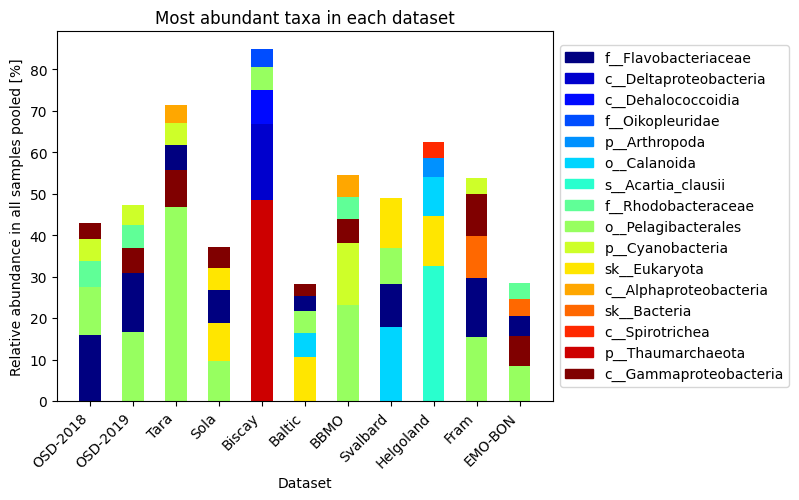

In [ ]:

fig, ax = plt.subplots()
x_positions = np.arange(len(ds_normalized))  # one bar per DataFrame
bar_width = 0.5

xlabels = []
for i, (label, df_orig) in enumerate(ds_normalized.items()):
    bottom = 0
    df = df_orig.copy()
    # first sum off the samples ie columns
    df['sum'] = df.iloc[:, 1:].sum(axis=1) / (len(df.columns)-1) *100
    # print(df['sum'].sum(), len(df.columns)-2)
    # then sort by sum
    df = df.sort_values(by='sum', ascending=False)

    # keep only the top X species
    df = df.head(5)

    for j, val in enumerate(df['sum']):
        ax.bar(x_positions[i], val, bottom=bottom, width=bar_width,
               color=color_dict[df['#SampleID'].iloc[j].split(";")[-1]],
        )
        bottom += val
    xlabels.append(label)

# manual legend
handles = [plt.Rectangle((0,0),1,1, color=color_dict[name]) for name in top_species]
ax.legend(handles, top_species, loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_xticks(x_positions)
ax.set_xticklabels(xlabels, rotation=45, ha='right')

ax.set_ylabel('Relative abundance in all samples pooled [%]')
ax.set_xlabel('Dataset')
ax.set_title('Most abundant taxa in each dataset')
plt.show()

### Alpha diversity

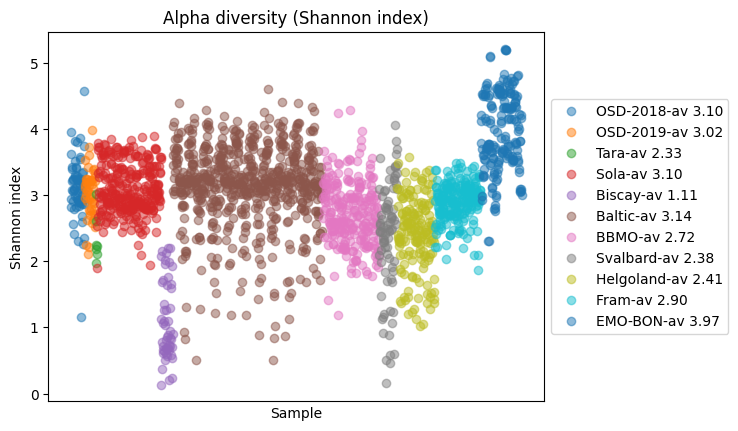

In [30]:
# start from the DS dictionary
from momics.diversity import calculate_shannon_index

for k, v in ds.items():
    df = v.copy().T
    shannon_vals = calculate_shannon_index(df)
    plt.plot(shannon_vals, 'o', alpha=0.5, label=f'{k}-av {shannon_vals.mean():.2f}')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.xticks([])
plt.xlabel('Sample')
plt.ylabel('Shannon index')
plt.title('Alpha diversity (Shannon index)')
plt.show()

### Beta diversity

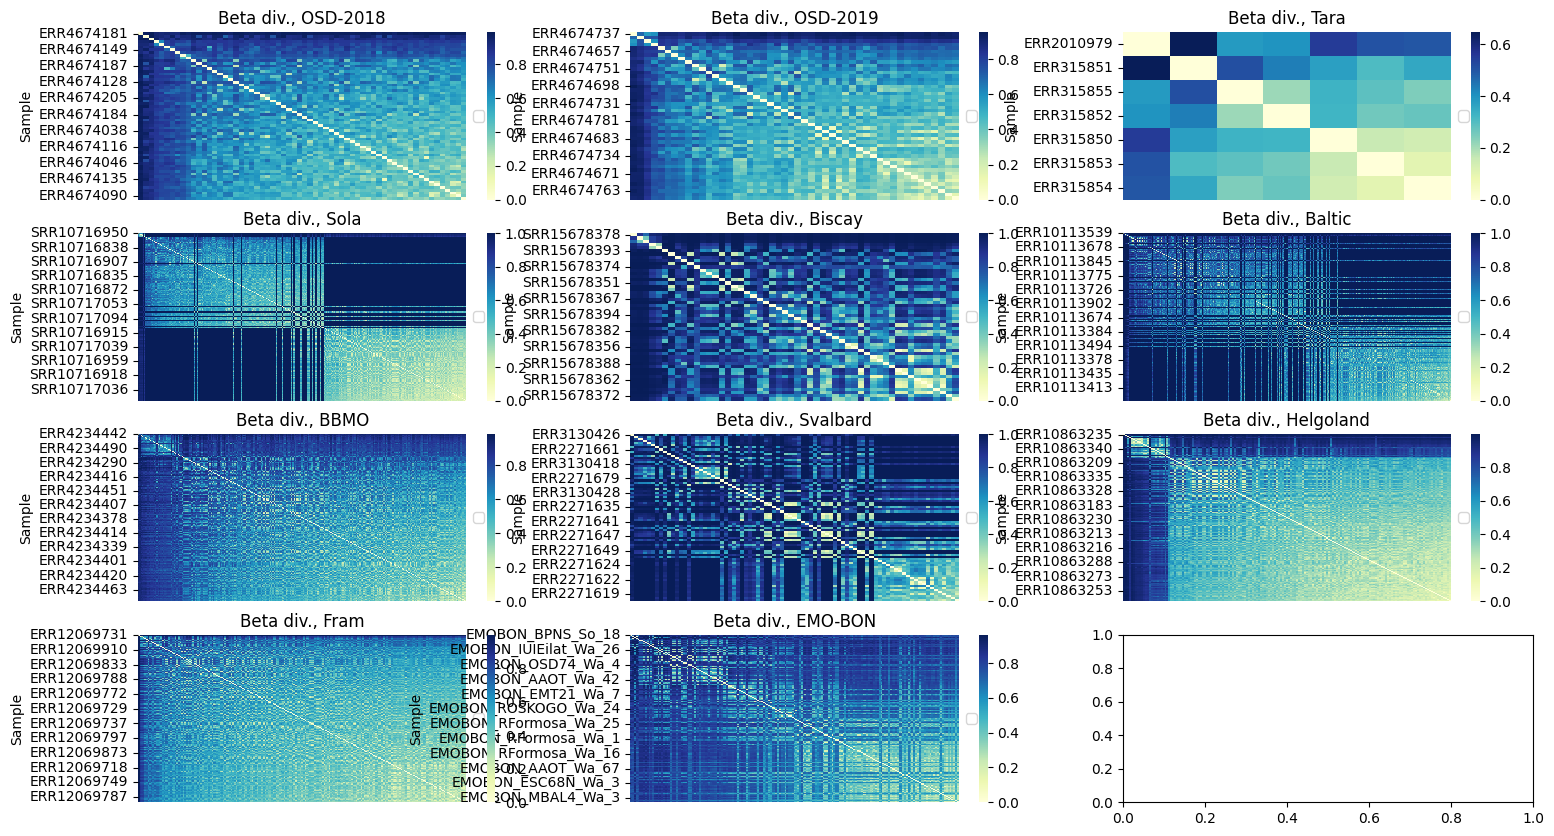

In [31]:
from skbio.diversity import beta_diversity
import seaborn as sns
from skbio.stats.ordination import pcoa

pcoa_res, explained_var = {}, {}

fig, ax = plt.subplots(4, 3, figsize=(18, 10))
# starts from the normalized DS dictionary
for i, (k, v) in enumerate(ds.items()):
    df = v.set_index('#SampleID').copy().T
    beta = beta_diversity('braycurtis', df)
    #order beta
    df_beta = beta.to_data_frame()

    # this is for later use in PCoA
    pcoa_result = pcoa(df_beta, method="eigh")
    pcoa_res[k] = pcoa_result
    explained_var[k] = (
        pcoa_result.proportion_explained[0],
        pcoa_result.proportion_explained[1],
    )

    sums = df_beta.sum(axis=1)

    # Sort index by sum
    sorted_idx = sums.sort_values(ascending=False).index

    # Reorder both rows and columns
    corr_sorted = df_beta.loc[sorted_idx, sorted_idx]
    curr_ax = ax.flatten()[i]
    sns.heatmap(corr_sorted, cmap="YlGnBu", ax=curr_ax)
    curr_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    curr_ax.set_xticks([])
    curr_ax.set_ylabel('Sample')
    curr_ax.set_title(f'Beta div., {k}')
plt.show()

### PCoA

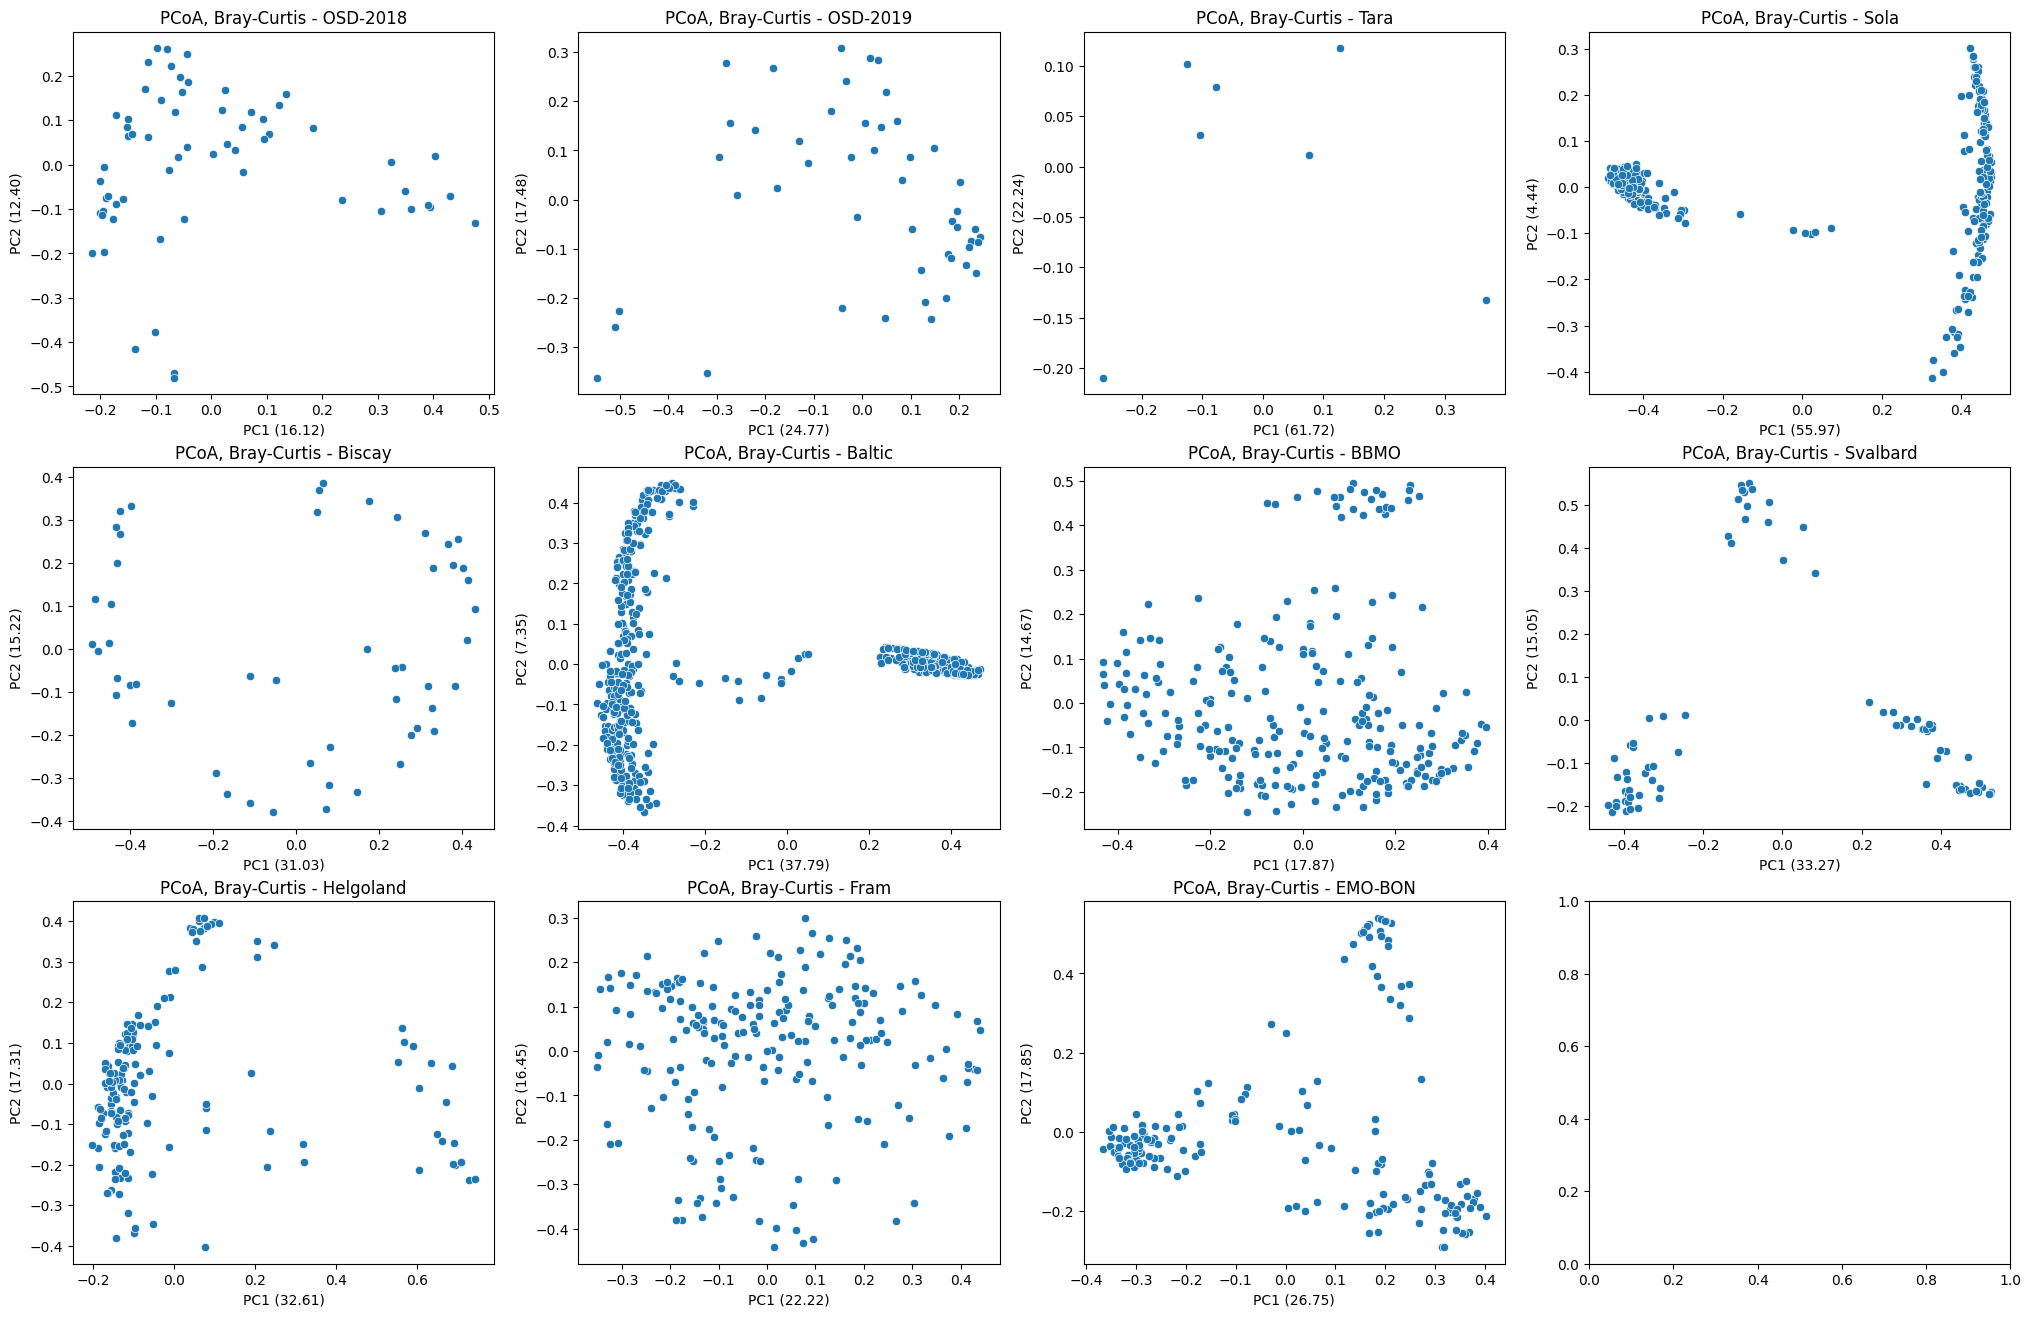

In [32]:
fig, ax = plt.subplots(3, 4, figsize=(25, 16))

for i, (k, v) in enumerate(pcoa_res.items()):
    curr_ax = ax.flatten()[i]

    sns.scatterplot(
        data=v.samples,
        x="PC1",
        y="PC2",
        ax=curr_ax,
    )
    curr_ax.set_xlabel(f"PC1 ({explained_var[k][0]*100:.2f})")
    curr_ax.set_ylabel(f"PC2 ({explained_var[k][1]*100:.2f})")
    curr_ax.set_title(f"PCoA, Bray-Curtis - {k}")

### Metric multidimensional scaling (MDS)

In [33]:
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform

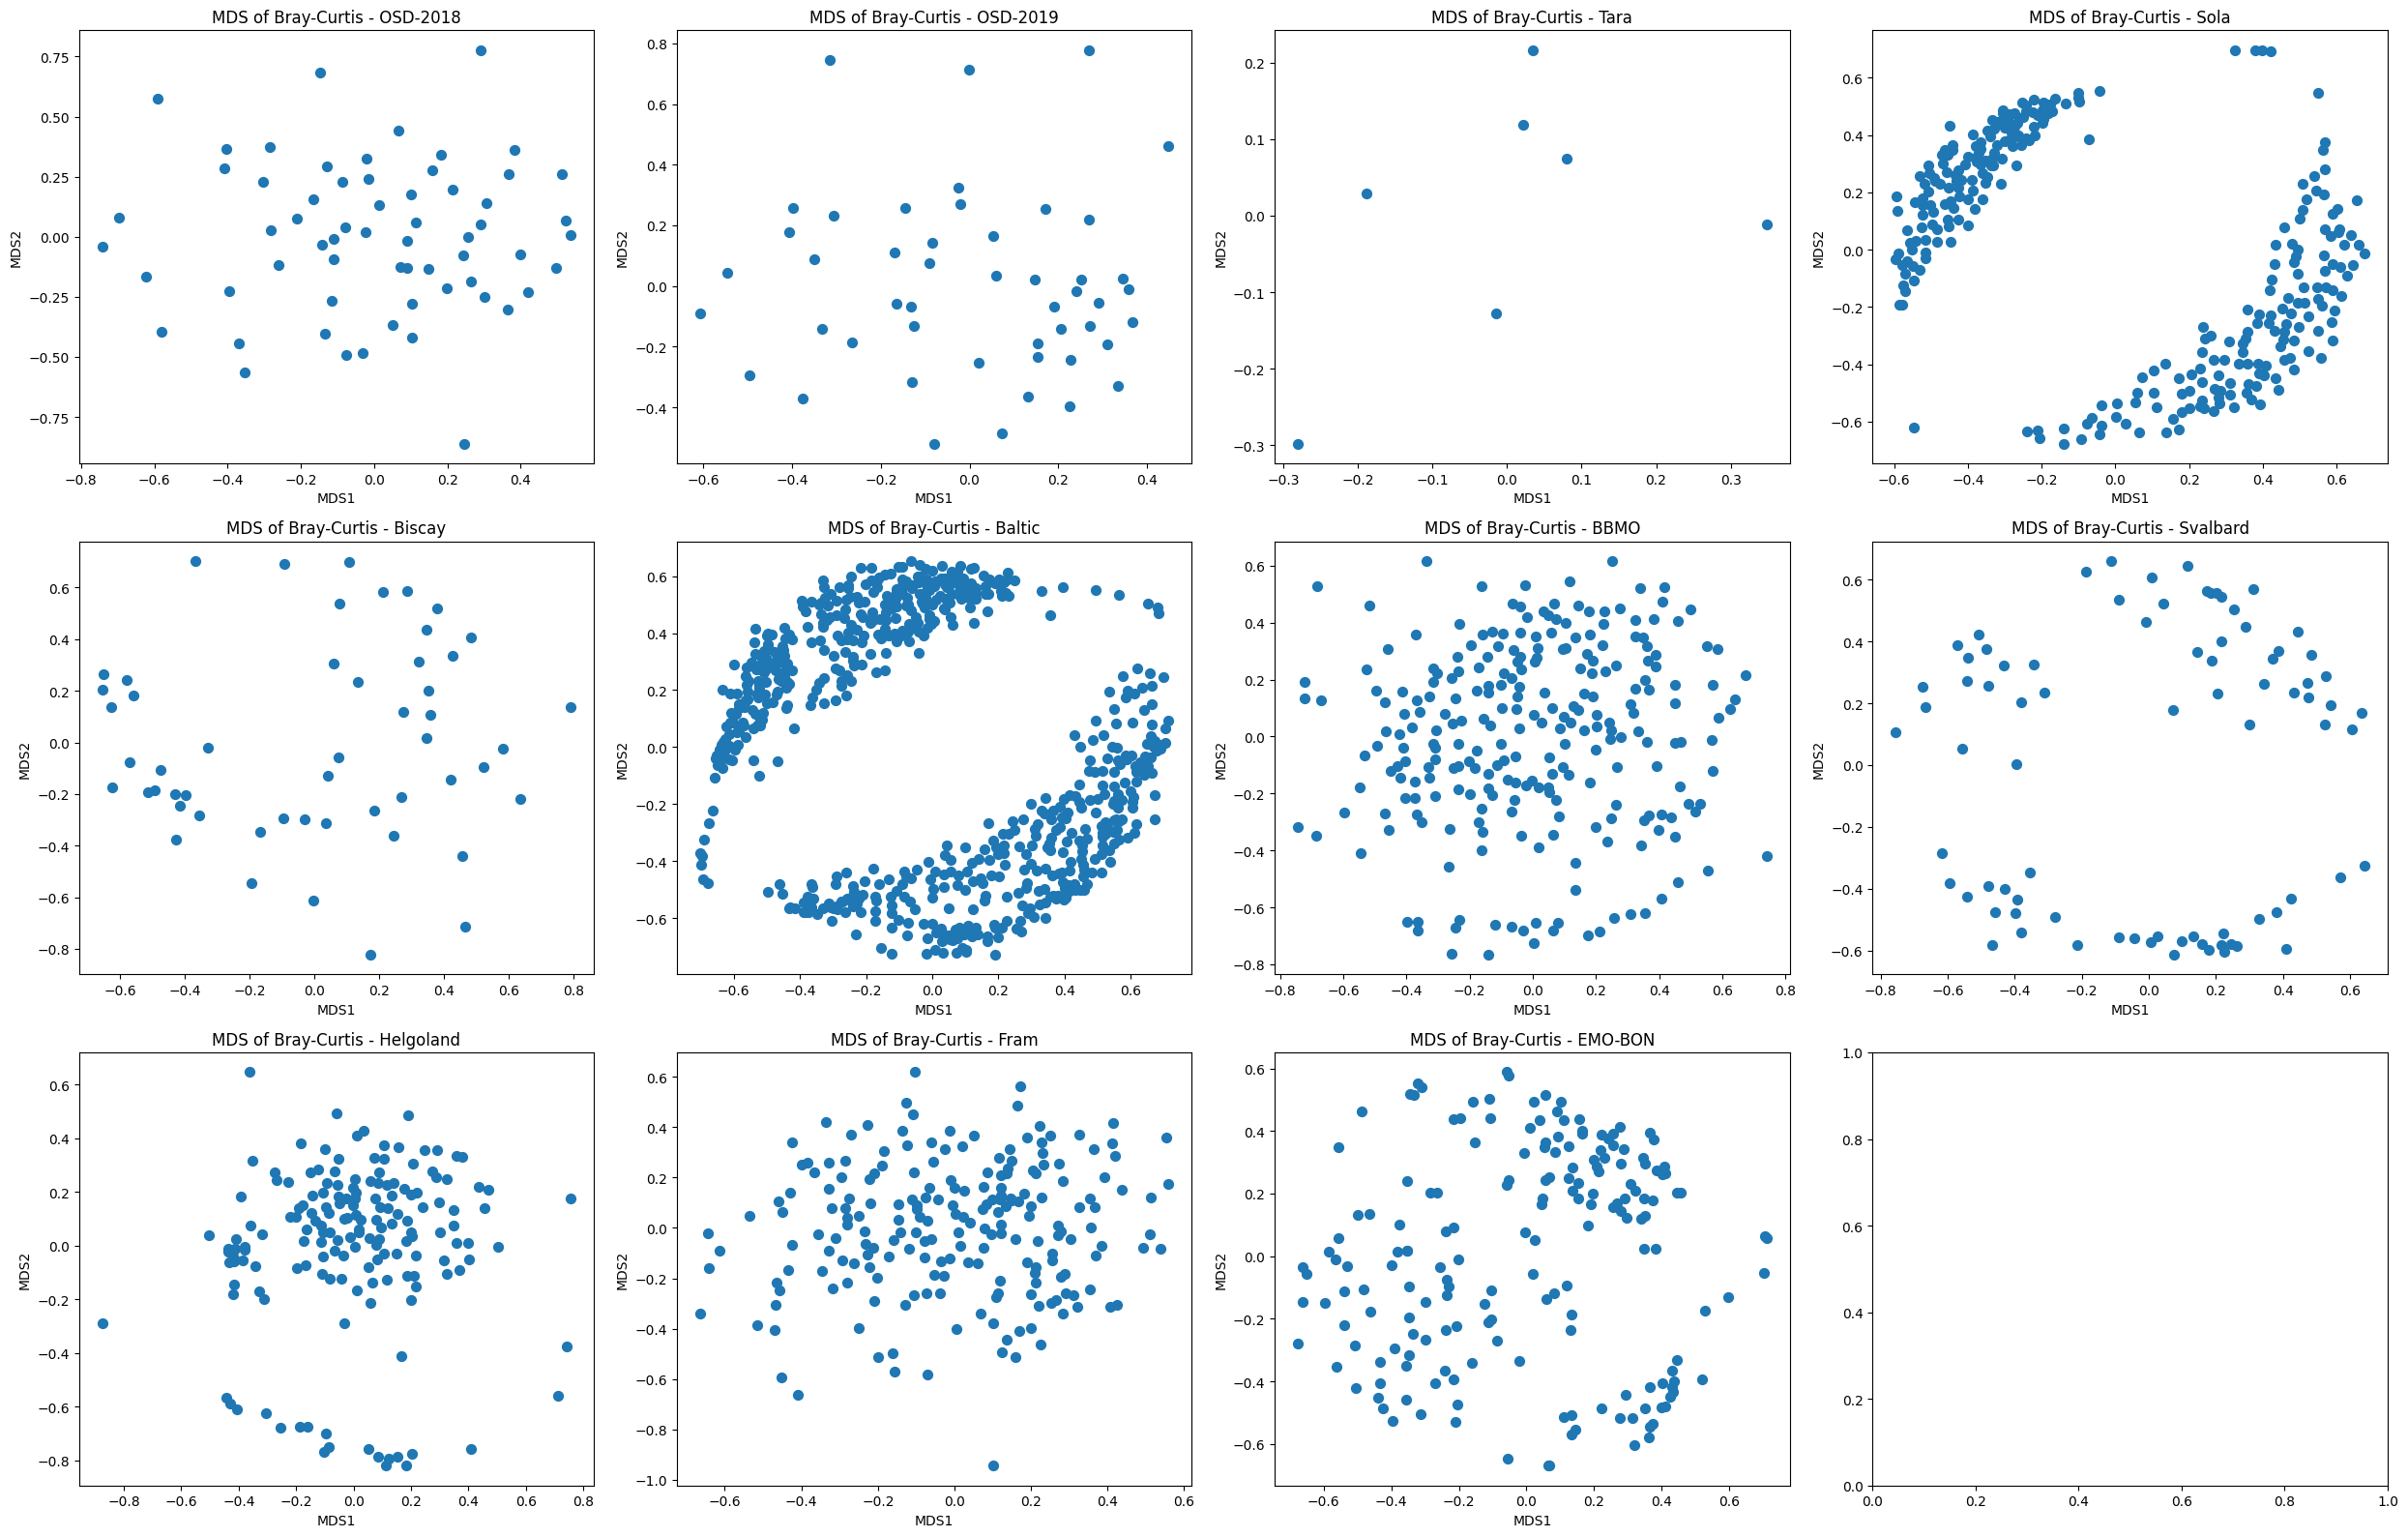

In [34]:
fig, ax = plt.subplots(3, 4, figsize=(25, 16))

for i, (k, v) in enumerate(ds.items()):
    curr_ax = ax.flatten()[i]
    df = v.set_index('#SampleID').copy().T

    # Step 1: Calculate Bray-Curtis distance matrix
    # Note: pdist expects a 2D array, so we use df.values
    dist_matrix = pdist(df.values, metric='braycurtis')
    dist_square = squareform(dist_matrix)

    # Step 3: Run MDS
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    coords = mds.fit_transform(dist_square)

    # Step 4: Plot
    curr_ax.scatter(coords[:, 0], coords[:, 1], s=50)

    # Optional: label samples
    # for i, sample_id in enumerate(df.index):
    #     curr_ax.text(coords[i, 0], coords[i, 1], sample_id, fontsize=8)

    curr_ax.set_title("MDS of Bray-Curtis - " + k)
    curr_ax.set_xlabel("MDS1")
    curr_ax.set_ylabel("MDS2")
    # curr_ax.grid(True)
plt.tight_layout()
plt.show()

### Non-metric multidimensional scaling (NMDS)
- does not work yet, needs mapping back to the original coordinate system I think

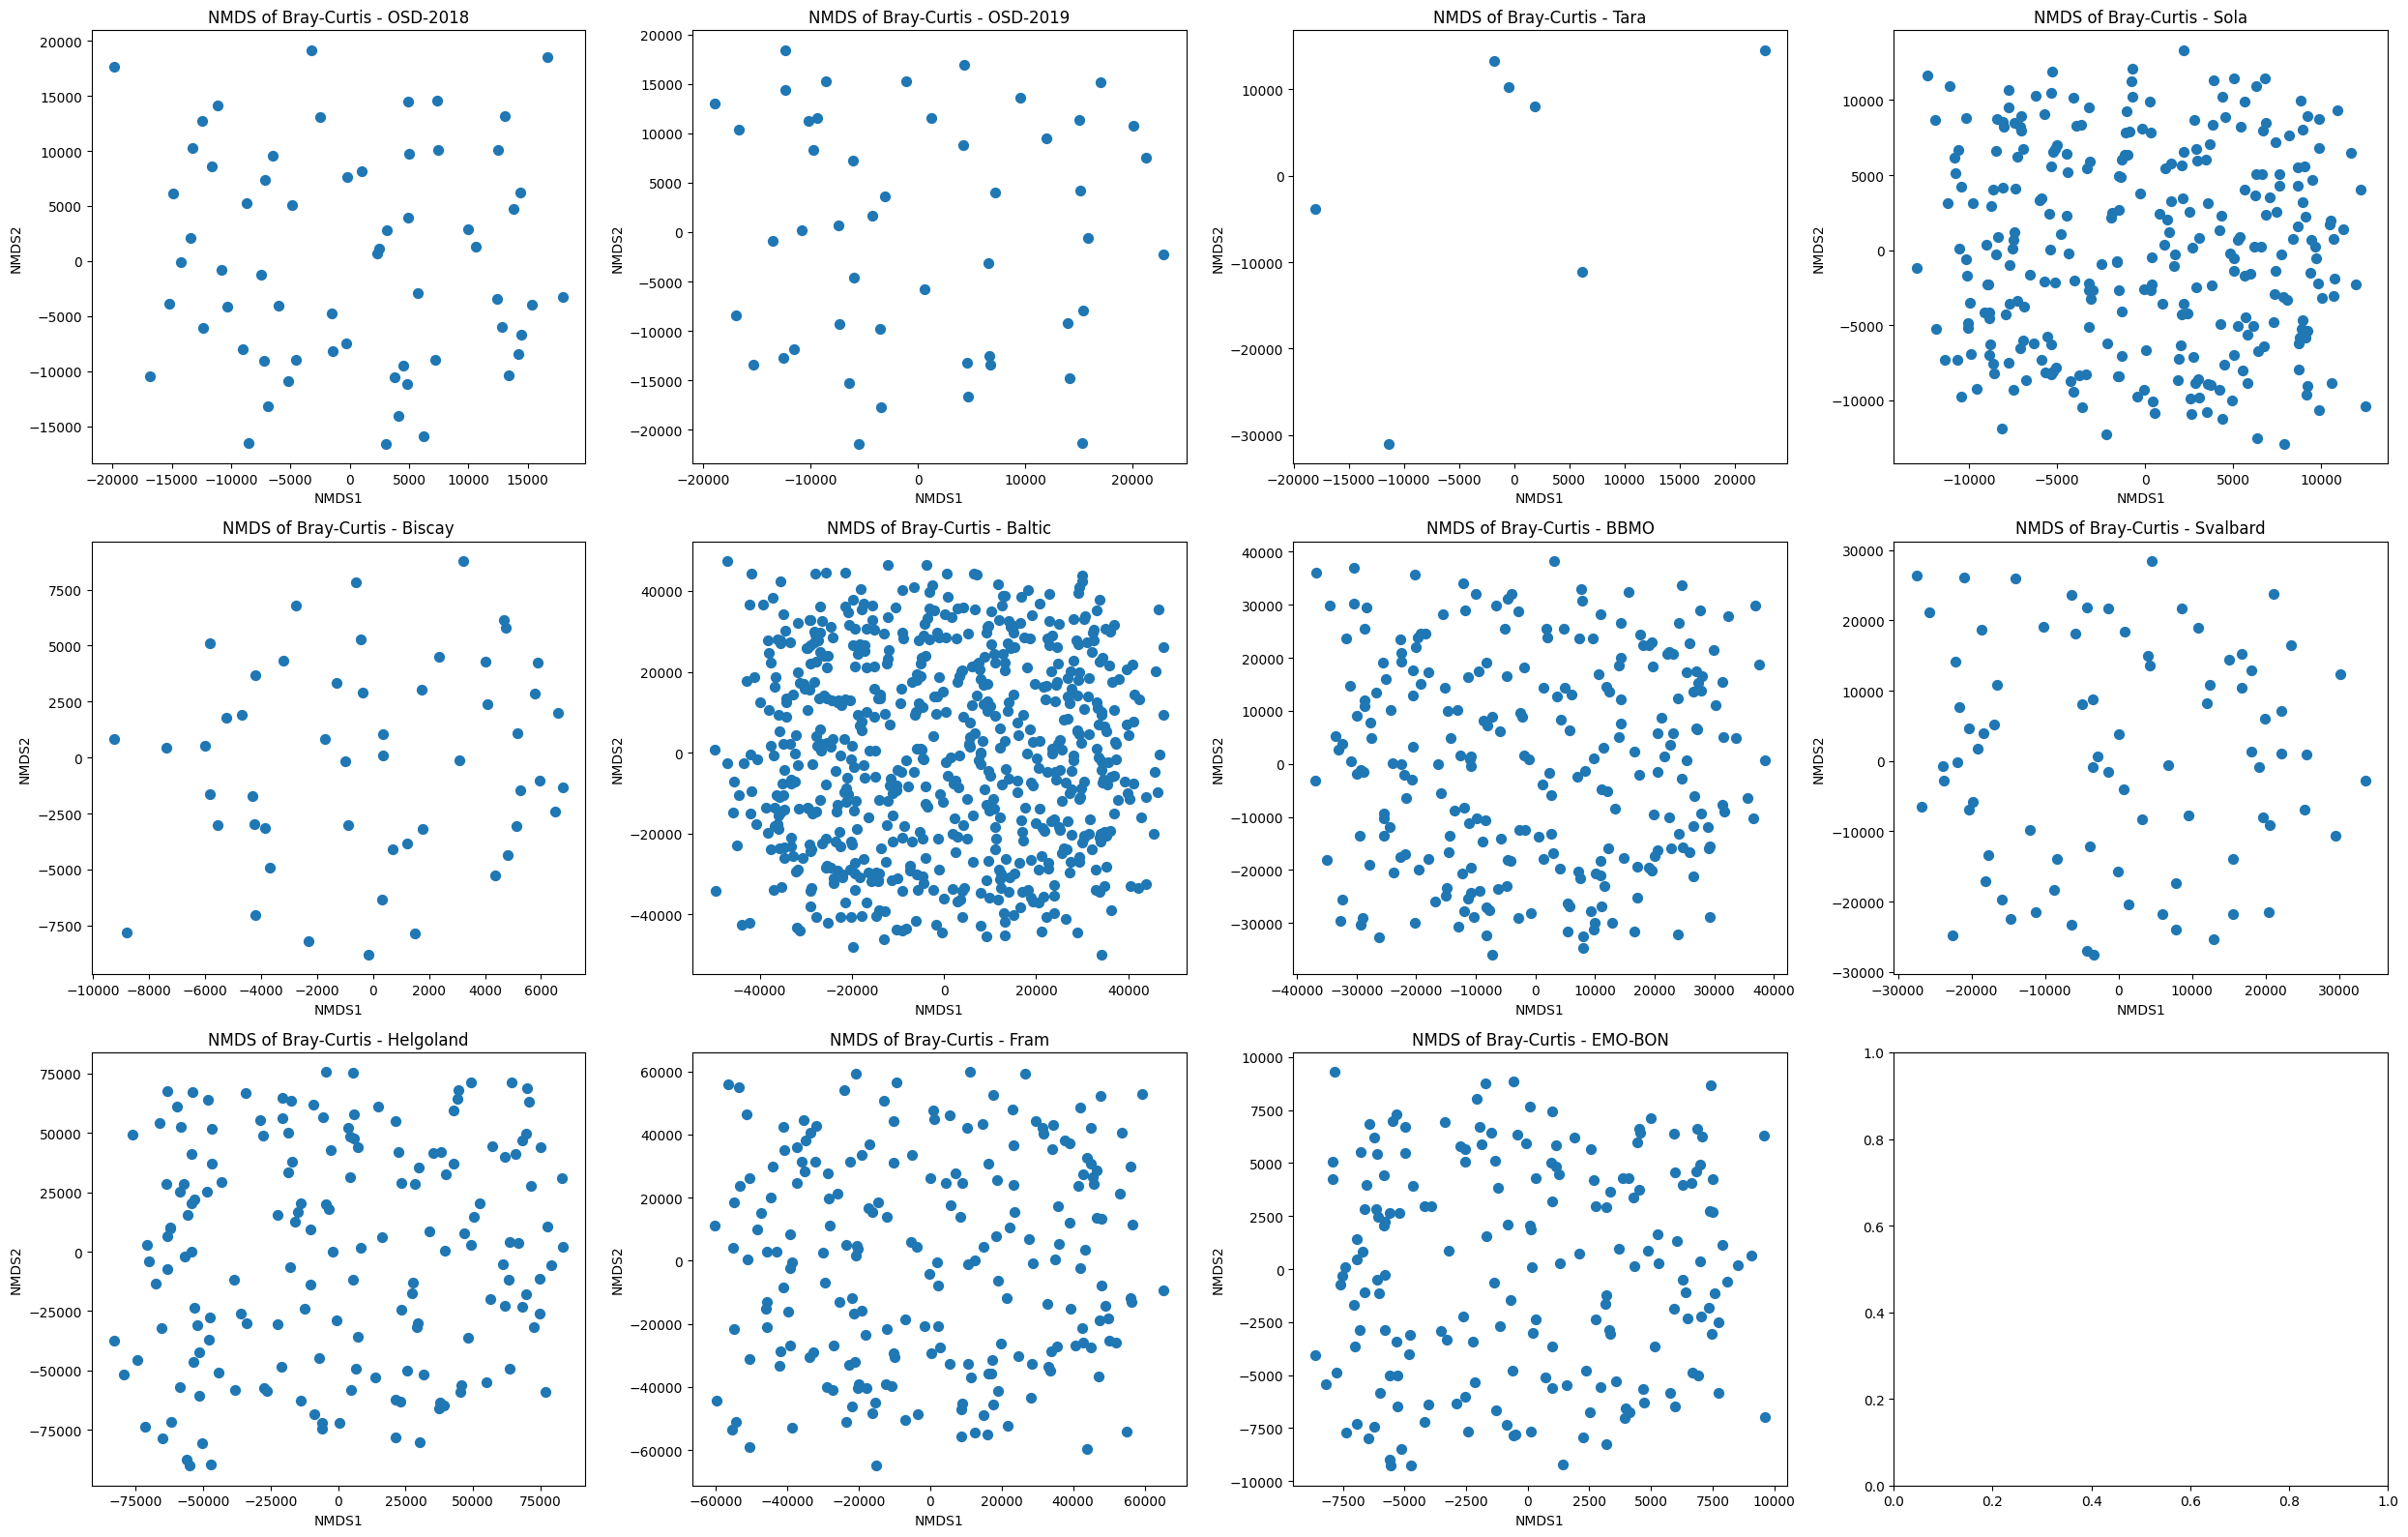

In [35]:
fig, ax = plt.subplots(3, 4, figsize=(25, 16))

for i, (k, v) in enumerate(ds.items()):
    curr_ax = ax.flatten()[i]
    df = v.set_index('#SampleID').copy().T

    # Step 1: Calculate Bray-Curtis distance matrix
    # Note: pdist expects a 2D array, so we use df.values
    dist_matrix = pdist(df.values, metric='braycurtis')
    dist_square = squareform(dist_matrix)

    # Step 3: Run NMDS
    nmds = MDS(n_components=2, dissimilarity='precomputed',
               metric=False,  # this is the non-metric part
               random_state=42)
    coords = nmds.fit_transform(dist_square)
    coords *= np.sqrt((df.values**2).sum()) / np.sqrt((coords**2).sum())

    # Step 4: Plot
    curr_ax.scatter(coords[:, 0], coords[:, 1], s=50)

    curr_ax.set_title("NMDS of Bray-Curtis - " + k)
    curr_ax.set_xlabel("NMDS1")
    curr_ax.set_ylabel("NMDS2")
    # curr_ax.grid(True)
plt.tight_layout()
plt.show()

### Venn diagram of taxonomic IDs overlap
- works only up to 4 sets

In [20]:
from venny4py.venny4py import *

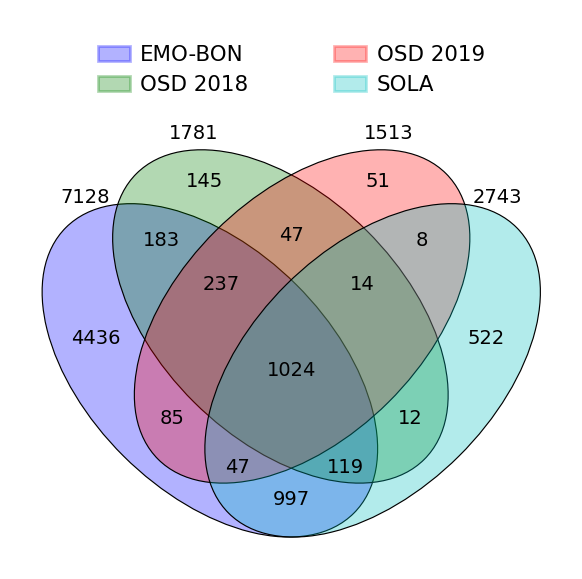

In [23]:
#dict of sets
sets = {
    'EMO-BON': set(ds_normalized['EMO-BON']['#SampleID'].values),
    'OSD 2018': set(ds_normalized['OSD-2018']['#SampleID'].values),
    'OSD 2019': set(ds_normalized['OSD-2019']['#SampleID'].values),
    'SOLA': set(ds_normalized['Sola']['#SampleID'].values),
    
}

fig = venny4py(sets=sets, out = 'venn4_studies')

### Cummulative taxa discovery along the sampling campaigns
- If we consider samplings over time, how do we accumulate identified taxa?
- Hypothesis is, that if close to linear, the sampling is heavily undersampling the reality of changing microbiome at the sampling sites.

In [56]:
# for other datasets I do not order by date
res_dict = {}
for key, ds in ds_normalized.items():
    cumm_taxa = set()
    res_dict[key] = [0]
    for idx in ds.columns[1:].to_list():
        data = ds[idx]  # single sampling
        positive_idx = data[data > 0].index.to_list()  # filter the once with abundance
        cumm_taxa.update(positive_idx)  # add to the set
        res_dict[key].append(len(cumm_taxa))  # append count which equals to updated set

cumm_taxa = set()
taxa_count = [0]
for idx, row in full_metadata['collection date'].sort_values().items():

    data = ds_normalized['EMO-BON'][idx]  # single sampling
    positive_idx = data[data > 0].index.to_list()  # filter the once with abundance
    cumm_taxa.update(positive_idx)  # add to the set
    taxa_count.append(len(cumm_taxa))  # append count which equals to updated set

res_dict['EMO-BON'] = taxa_count

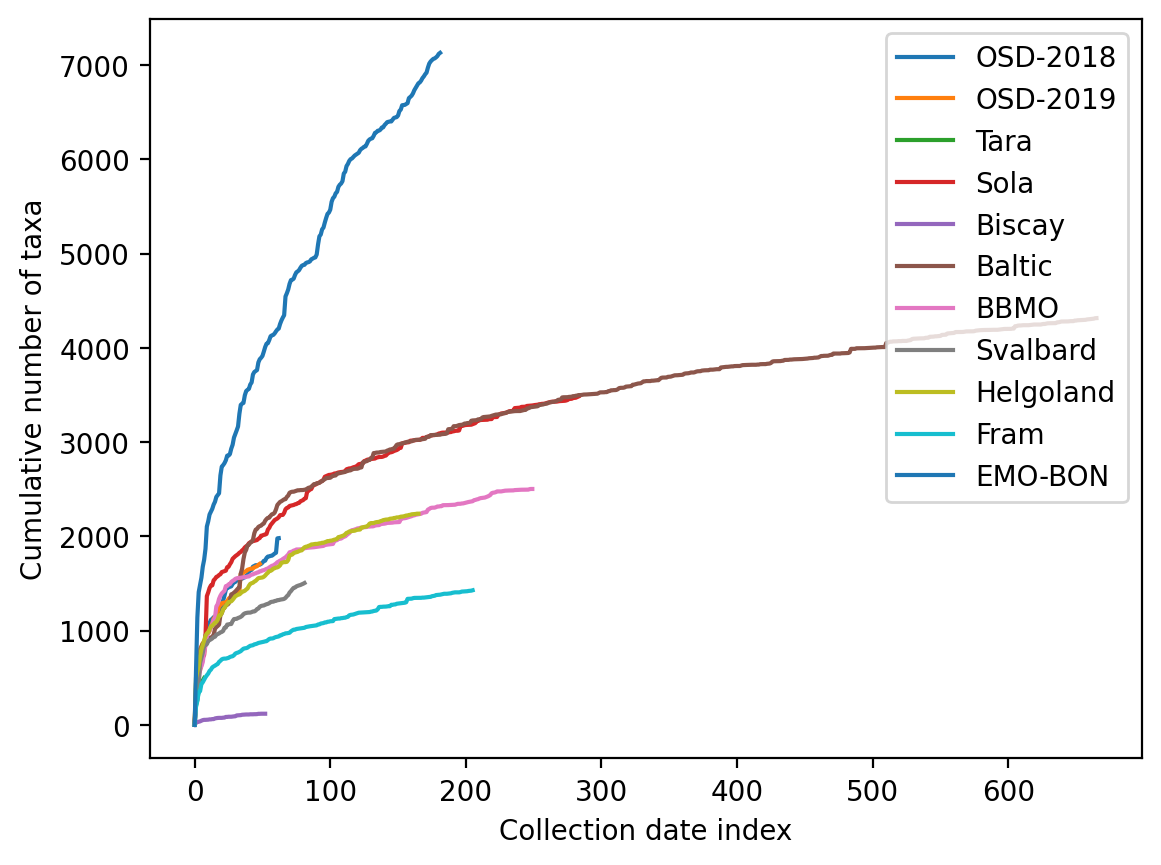

In [57]:
for key, taxa_count in res_dict.items():
    plt.plot(
        taxa_count,
        label=key
    )
plt.xlabel('Collection date index')
plt.ylabel('Cumulative number of taxa')
plt.legend()
plt.show()

In [48]:
last_x = 100
print(f'Steady rate of taxonomic discovery: {(taxa_count[-1] - taxa_count[-last_x-1]) / last_x} taxa per collection date')

Steady rate of taxonomic discovery: 22.49 taxa per collection date
